In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_df = "data/city_data.csv"
ride_df = "data/ride_data.csv"

city_df = pd.read_csv(city_df)
ride_df = pd.read_csv(ride_df)

# Read the City and Ride Data
city_df.head()
ride_df.head()
# Combine the data into a single dataset
df = pd.merge(city_df, ride_df, on="city", how="outer")
# Display the data table for preview
#print(df.count())
df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

In [2]:
# Obtain the x and y coordinates for each of the three city types

rides_df = df.groupby(["type", "city"])["driver_count"].count()
rides_df.head()
fare_df = df.groupby(["type", "city"])["fare"].mean().round(2)
fare_df.head()

rides_fares_df = pd.concat([rides_df, fare_df], axis=1)
rides_fares_df = rides_fares_df.rename(columns={"driver_count": "Total Rides","fare": "Average Fare"})

rides_fares_df.head()

Total Rides  Average Fare
type  city                                     
Rural Bradshawfurt             10         40.06
      Garzaport                 3         24.12
      Harringtonfort            6         33.47
      Jessicaport               6         36.01
      Lake Jamie                6         34.36

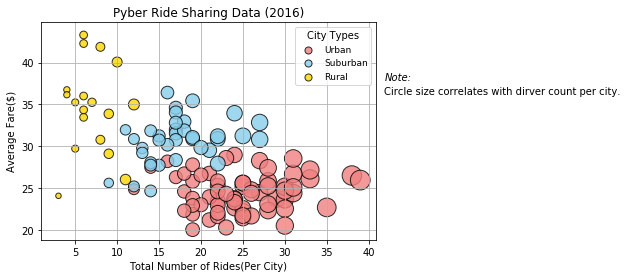

In [6]:
# Incorporate the other graph properties
plt.scatter(rides_df.loc["Urban"], fare_df.loc["Urban"], marker = "o", color= "Lightcoral", edgecolor= "black", alpha = .8, s= rides_df.loc["Urban"] * 10)
plt.scatter(rides_df.loc["Suburban"], fare_df.loc["Suburban"], marker = "o", color= "Skyblue", edgecolor= "black", alpha = .8, s= rides_df.loc["Suburban"] * 10)
plt.scatter(rides_df.loc["Rural"], fare_df.loc["Rural"], marker = "o", color= "Gold", edgecolor= "black", alpha = .8, s= rides_df.loc["Rural"]* 10)
#Gold, Light Sky Blue, and Light Coral
# Incorporate a text label regarding circle size

plt.figtext(x= .92, y= .68, s="Note:", fontstyle="oblique")
plt.figtext(x= .92, y= .63, s="Circle size correlates with dirver count per city.")

# Legend adjustment
legend_lables = ["Urban", "Suburban", "Rural"]
lgd = plt.legend(title= "City Types", labels = legend_lables, prop={'size': 9})
lgd.legendHandles[0]._sizes = [50]
lgd.legendHandles[1]._sizes = [50]
lgd.legendHandles[2]._sizes = [50]

# Add graph fluff
plt.grid()
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides(Per City)")
plt.ylabel("Average Fare($)")

# Save and show Figure
plt.savefig("Images/Pyber Ride Sharing Data 2016.png")
plt.show()

## Total Fares by City Type

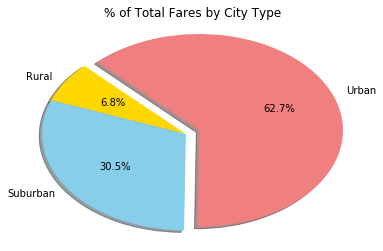

In [7]:
# Calculate Type Percents
Fare_Total_df = df.groupby("type")["fare"].sum()
Fare_Total_df = pd.DataFrame(Fare_Total_df)
Fare_Sum = Fare_Total_df["fare"].sum()
Fare_Total_df["Fare Percent"] = (Fare_Total_df["fare"] / Fare_Sum * 100).round(1)
Fare_Total_df

# Build Pie Chart

# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]

# The values of each section of the pie chart
sizes = Fare_Total_df["Fare Percent"]

# The colors of each section of the pie chart
colors = ["Gold", "Skyblue", "Lightcoral"]

# Tells matplotlib to seperate the "Urban" section from the others
explode = (0, 0, 0.1)

# Displays the Pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=135)


plt.axis("tight")
plt.title("% of Total Fares by City Type")

# Save and show Figure
plt.savefig("Images/Total_Fares_by_City_Type.png")
plt.show()

## Total Rides by City Type

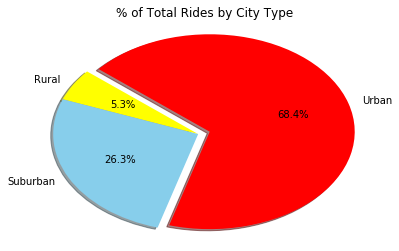

In [5]:
# Calculate Ride Percents
rides_df = pd.DataFrame(rides_df)
type_rides_df = rides_df.groupby("type")["driver_count"].sum()
type_rides_df = pd.DataFrame(type_rides_df)

rides_sum = type_rides_df["driver_count"].sum()
type_rides_df["Rides Percent"] = (type_rides_df["driver_count"] / rides_sum * 100).round(1)
type_rides_df

# Build Pie Chart

# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]

# The values of each section of the pie chart
sizes = type_rides_df["Rides Percent"]

# The colors of each section of the pie chart
colors = ["Yellow", "Skyblue", "Red"]

# Tells matplotlib to seperate the "Urban" section from the others
explode = (0, 0, 0.1)

# Displays the Pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140, radius = 1.2)
plt.title("% of Total Rides by City Type")
plt.axis("tight")

# Save and show Figure
plt.savefig("Images/Total_Rides_by_City_Type.png")
plt.show()

## Total Drivers by City Type

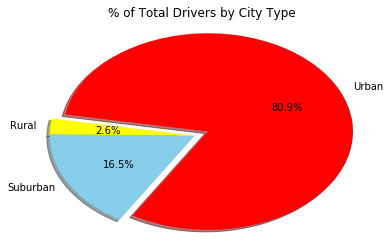

In [6]:
# Calculate Driver Percents
cities_TD_df = df.drop_duplicates(["type", "city"])

type_drivers_total_df = cities_TD_df.groupby(["type", "city"])["driver_count"].sum()
type_drivers_total_df = cities_TD_df.groupby("type")["driver_count"].sum()
type_drivers_total_df.sum()

type_drivers_total_df = pd.DataFrame(type_drivers_total_df)
rides_total_sum = type_drivers_total_df["driver_count"].sum()
type_drivers_total_df["Rides Percent"] = (type_drivers_total_df["driver_count"] / rides_total_sum * 100).round(1)
type_drivers_total_df

# Build Pie Chart

# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]

# The values of each section of the pie chart
sizes = type_drivers_total_df["Rides Percent"]

# The colors of each section of the pie chart
colors = ["Yellow", "Skyblue", "Red"]

# Tells matplotlib to seperate the "Urban" section from the others
explode = (0, 0, 0.1)

# Displays the Pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=170)
plt.title("% of Total Drivers by City Type")
plt.axis("tight")

# Save and show Figure
plt.savefig("Images/Total_Drivers_by_City_Type.png")
plt.show()